### Source: 

https://github.com/hfawaz/cd-diagram

In [1]:
import pandas as pd
import numpy as np
from evaldata import EvalData
from criticaldifference import CriticalDifference

# Load Data

In [2]:
BASE = 'AnomalyDetection_NabData_Txt\\'
# measure = 'Accuracy'
# measure = 'Precision'
measure = 'Recall'
# measure = 'f-measure'
# measure = 'cohen_kappa_score'
# measure = 'auc'


title = ''
if measure == 'f-measure':
    SUB = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")
    #title = 'F1 Score'.translate(SUB)
    title = 'F1 Score'
elif measure == 'cohen_kappa_score':
    title = 'Cohen Kappa Score'
elif measure == 'auc':
    title = 'Area Under Curve'
else:
    title = measure

ed = EvalData()
data = ed.get_data(BASE, measure)
data.shape

Eval Data Object Created


(9, 46)

# Visualise

In [3]:
mod_list = ['MadGan', 'AutoEncoder', 'VanLstm', 'IsoForest', 'GMM', 'OcSVM', 'BiLstmGan', 'CnnGan', 'ALGAN']
dset_list = ['dataset'+str(i+1) for i in range(data.shape[1])]
#measure = 'accuracy'

rows = []
for i, row in enumerate(data):
    for j, col in enumerate(row):
        arow = {'model':mod_list[i], 'dataset':dset_list[j], 'accuracy':col}
        rows.append(arow)

df = pd.DataFrame(rows)

In [4]:
df.head(5)

,model,dataset,accuracy
0,MadGan,dataset1,1.00
1,MadGan,dataset2,0.56
2,MadGan,dataset3,0.75
3,MadGan,dataset4,1.00
4,MadGan,dataset5,1.00


In [5]:
cd = CriticalDifference()
cd.draw_cd_diagram(df_perf=df, title=title, labels=True)

Critical Difference Object Created
['MadGan' 'AutoEncoder' 'VanLstm' 'IsoForest' 'GMM' 'OcSVM' 'BiLstmGan'
 'CnnGan' 'ALGAN']
ALGAN          3.0
AutoEncoder    0.0
BiLstmGan      0.0
CnnGan         1.0
GMM            2.0
IsoForest      0.0
MadGan         0.0
OcSVM          0.0
VanLstm        1.0
dtype: float64
OcSVM          6.130435
BiLstmGan      5.500000
CnnGan         5.358696
VanLstm        5.260870
IsoForest      4.793478
AutoEncoder    4.771739
MadGan         4.510870
GMM            4.456522
ALGAN          4.217391
dtype: float64
('GMM', 'OcSVM', 0.00014034888130969655, True)
('ALGAN', 'OcSVM', 0.0003349089344171943, True)
('MadGan', 'OcSVM', 0.0006127246837957725, True)
('BiLstmGan', 'GMM', 0.0010954502922129348, True)
('ALGAN', 'BiLstmGan', 0.0016249420717477877, False)
('AutoEncoder', 'OcSVM', 0.0029898698661095465, False)
('IsoForest', 'OcSVM', 0.003942958478760473, False)
('ALGAN', 'CnnGan', 0.006296814238528157, False)
('BiLstmGan', 'MadGan', 0.010160598173465252, False)
(

C:\Users\basharm\Anaconda3\lib\site-packages\scipy\stats\_morestats.py:3255: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


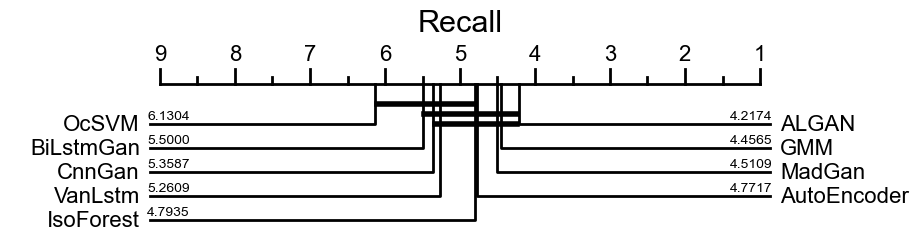

In [6]:
from IPython.display import Image
Image("cd-diagram.png")